#### Backpropagation
- Let's go back to our simple FNN to put things in perspective
    - Let us ignore non-linearities for now to keep it simpler, but it's just a tiny change subsequently
    - Given a linear transformation on our input (for simplicity instead of an affine transformation that includes a bias): $\hat y = \theta x$
        - $\theta$ is our parameters
        - $x$ is our input
        - $\hat y$ is our prediction
    - Then we have our loss function $L = \frac{1}{2} (\hat y - y)$
- We need to calculate our partial derivatives of our loss w.r.t. our parameters to update our parameters: $\nabla_{\theta} = \frac{dL}{d\theta}$
    - With chain rule we have $\frac{dL}{d \theta} = \frac{dL}{dy} \frac{dy}{d \theta}$
        - $\frac{dL}{dy} = (\hat y -  y)$
        - $\frac{dy}{d \theta}$ is our partial derivatives of y w.r.t. our parameters (our gradient)

In [1]:
import torch
import torch.nn as nn

In [2]:
X = torch.tensor(([2, 9], [1, 5], [3, 6]), dtype=torch.float) # 3 X 2 tensor
y = torch.tensor(([92], [100], [89]), dtype=torch.float) # 3 X 1 tensor
xPredicted = torch.tensor(([4, 8]), dtype=torch.float) # 1 X 2 tensor

In [3]:
print(X.size())
print(y.size())

torch.Size([3, 2])
torch.Size([3, 1])


In [4]:
# scale units
X_max, _ = torch.max(X, 0)
xPredicted_max, _ = torch.max(xPredicted, 0)

X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100

In [6]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        

In [8]:
NN = Neural_Network()
loss_lst = []
for i in range(1000):  # trains the NN 1,000 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    loss_lst.append(torch.mean((y - NN(X))**2).detach().item())
    NN.train(X, y)

#0 Loss: 0.15593862533569336
#1 Loss: 0.09614866971969604
#2 Loss: 0.06381534039974213
#3 Loss: 0.045552074909210205
#4 Loss: 0.03445689007639885
#5 Loss: 0.027250075712800026
#6 Loss: 0.022305255755782127
#7 Loss: 0.018760118633508682
#8 Loss: 0.016126910224556923
#9 Loss: 0.01411380898207426
#10 Loss: 0.012537665665149689
#11 Loss: 0.011278732679784298
#12 Loss: 0.010256008245050907
#13 Loss: 0.00941301230341196
#14 Loss: 0.008709365501999855
#15 Loss: 0.008115552365779877
#16 Loss: 0.007609547581523657
#17 Loss: 0.007174663711339235
#18 Loss: 0.0067980121821165085
#19 Loss: 0.006469555199146271
#20 Loss: 0.006181338336318731
#21 Loss: 0.00592699833214283
#22 Loss: 0.005701401736587286
#23 Loss: 0.005500353407114744
#24 Loss: 0.005320416763424873
#25 Loss: 0.005158723331987858
#26 Loss: 0.00501289451494813
#27 Loss: 0.004880925640463829
#28 Loss: 0.004761120770126581
#29 Loss: 0.00465202983468771
#30 Loss: 0.0045524281449615955
#31 Loss: 0.00446124654263258
#32 Loss: 0.00437757931649

#476 Loss: 0.0026767172385007143
#477 Loss: 0.0026755270082503557
#478 Loss: 0.002674344927072525
#479 Loss: 0.0026731558609753847
#480 Loss: 0.0026719728484749794
#481 Loss: 0.0026707814540714025
#482 Loss: 0.002669595880433917
#483 Loss: 0.0026684061158448458
#484 Loss: 0.0026672144886106253
#485 Loss: 0.002666029380634427
#486 Loss: 0.002664836822077632
#487 Loss: 0.0026636403053998947
#488 Loss: 0.002662449376657605
#489 Loss: 0.002661255421116948
#490 Loss: 0.0026600633282214403
#491 Loss: 0.0026588747277855873
#492 Loss: 0.0026576800737529993
#493 Loss: 0.0026564865838736296
#494 Loss: 0.0026552907656878233
#495 Loss: 0.0026540961116552353
#496 Loss: 0.0026528991293162107
#497 Loss: 0.002651705639436841
#498 Loss: 0.0026505060959607363
#499 Loss: 0.002649306319653988
#500 Loss: 0.0026481058448553085
#501 Loss: 0.002646910259500146
#502 Loss: 0.0026457123458385468
#503 Loss: 0.002644512103870511
#504 Loss: 0.0026433076709508896
#505 Loss: 0.0026421097572892904
#506 Loss: 0.0026409

#981 Loss: 0.002054517390206456
#982 Loss: 0.002053341595456004
#983 Loss: 0.002052172552794218
#984 Loss: 0.002050998853519559
#985 Loss: 0.002049830975010991
#986 Loss: 0.002048664027824998
#987 Loss: 0.0020474963821470737
#988 Loss: 0.002046327805146575
#989 Loss: 0.0020451629534363747
#990 Loss: 0.0020439934451133013
#991 Loss: 0.002042829291895032
#992 Loss: 0.0020416623447090387
#993 Loss: 0.0020404972601681948
#994 Loss: 0.0020393340382725
#995 Loss: 0.002038170350715518
#996 Loss: 0.0020370108541101217
#997 Loss: 0.002035850891843438
#998 Loss: 0.0020346862729638815
#999 Loss: 0.002033526310697198


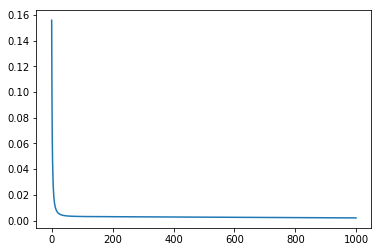

In [10]:
import pandas as pd
%matplotlib inline
pd.Series(loss_lst).plot()